In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os 
import requests
import pandas as pd 
import xml.etree.ElementTree as etree

from xml.dom import minidom
from lxml import html, etree
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
anime_page = requests.get("https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=172")
#print(anime_page.content)


In [3]:
manga_page = requests.get("https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=173")
#print(manga_page.content)

In [4]:
tree = etree.parse("Anime report1.xml")
root = tree.getroot()
columns = ["anime", "nb_votes", "nb_seen", "straight_average", "weighted_average", "bayesian_average"]
anime_df = pd.DataFrame(columns = columns)

for node in root: 
    anime = node.find("anime").text if node is not None else None
    votes = node.find("nb_votes").text if node is not None else None
    viewed = node.find("nb_seen").text if node is not None else None
    average = node.find("straight_average").text if node is not None else None
    weighted = node.find("weighted_average").text if node is not None else None
    bayesian = node.find("bayesian_average").text if node is not None else None
    anime_df = anime_df.append(pd.Series([anime, votes, viewed, average, weighted, bayesian], index = columns), ignore_index = True)

In [5]:
#anime_df

In [6]:
tree = etree.parse("Manga report1.xml")
root = tree.getroot()
columns = ["manga", "nb_votes", "nb_seen", "straight_average", "weighted_average", "bayesian_average"]
manga_df = pd.DataFrame(columns = columns)

for node in root: 
    manga = node.find("manga").text if node is not None else None
    votes = node.find("nb_votes").text if node is not None else None
    viewed = node.find("nb_seen").text if node is not None else None
    average = node.find("straight_average").text if node is not None else None
    weighted = node.find("weighted_average").text if node is not None else None
    bayesian = node.find("bayesian_average").text if node is not None else None
    manga_df = manga_df.append(pd.Series([manga, votes, viewed, average, weighted, bayesian], index = columns), ignore_index = True)

In [7]:
#manga_df

In [8]:
csv_anime= "resources/anime.csv"
data_df = pd.read_csv(csv_anime)
#data_df.head()

In [9]:
csv2_anime= "resources/animelist.csv"
csv2data_df = pd.read_csv(csv2_anime)
csv2data_df.head()

,anime_id,title,anime,anime_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
0,36089,9,9,9,"group_inou, Nine",https://myanimelist.cdn-dena.com/images/anime/...,Music,Original,1,Finished Airing,...,NaN,NaN,NaN,[],NaN,NaN,NaN,Music,[],[]
1,34595,"""Parade"" de Satie","""Parade"" de Satie",サティの「パラード」,"Satie&#039;s ""Parade""",https://myanimelist.cdn-dena.com/images/anime/...,Movie,Original,1,Finished Airing,...,French composer Erik Satie (1866-1925) created...,NaN,NaN,[],NaN,NaN,"Yamamura Animation, Inc.","Music, Dementia",[],[]
2,3269,.hack//G.U. Trilogy,.hack//G.U. Trilogy,.hack//G.U. Trilogy,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Movie,Game,1,Finished Airing,...,NaN,NaN,NaN,"{'Prequel': [{'mal_id': 873, 'type': 'anime', ...","Bandai Visual, CyberConnect2","Funimation, Bandai Entertainment",NaN,"Action, Fantasy, Game, Sci-Fi",[],"['""Deepest Memories"" by Lien']"
3,4469,.hack//G.U. Trilogy: Parody Mode,.hack//G.U. Trilogy: Parody Mode,.hack//G.U. Trilogy,NaN,https://myanimelist.cdn-dena.com/images/anime/...,Special,Game,1,Finished Airing,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 3269, 'type': 'an...",Bandai Visual,NaN,NaN,"Fantasy, Game, Comedy, Sci-Fi, Parody",[],[]
4,454,.hack//Gift,.hack//Gift,.hack//GIFT,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Original,1,Finished Airing,...,NaN,NaN,NaN,"{'Parent story': [{'mal_id': 48, 'type': 'anim...",CyberConnect2,Bandai Entertainment,Bee Train,"Comedy, Fantasy, Game","['""Obsession"" by See-Saw']","['""Yasashii Yoake"" by See-Saw']"


In [10]:
csvtv_df = csv2data_df[csv2data_df.type == 'TV']
csvtv_df.to_csv(r'resources\TopTV.csv', index = False)
csvtv_df

,anime_id,title,anime,anime_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
5,298,.hack//Tasogare no Udewa Densetsu,.hack//Legend Of The Twilight,.hack//黄昏の腕輪伝説,".hack//Udeden, .hack//Legend of the Twilight B...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,...,NaN,Winter 2003,Unknown,"{'Adaptation': [{'mal_id': 117, 'type': 'manga...","Bandai Visual, Yomiko Advertising","Funimation, Bandai Entertainment",Bee Train,"Adventure, Comedy, Fantasy, Game, Sci-Fi, Shounen","['""New World"" by ROUND TABLE featuring Nino']","['""Emerald Green"" by See-Saw']"
9,873,.hack//Roots,.hack//roots,.hack//Roots,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,26,Finished Airing,...,NaN,Spring 2006,Unknown,"{'Prequel': [{'mal_id': 48, 'type': 'anime', '...","TV Tokyo, Bandai Visual, CyberConnect2","Funimation, Bandai Entertainment",Bee Train,"Adventure, Drama, Fantasy, Game, Sci-Fi","['""Silly-go-Round"" by FictionJuction YUUKA']","['#1: ""Boukoku Kakusei - Catharsis"" by Ali Pro..."
10,48,.hack//Sign,.hack//Sign,.hack//SIGN,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,26,Finished Airing,...,NaN,Spring 2002,Thursdays at Unknown,"{'Sequel': [{'mal_id': 298, 'type': 'anime', '...","Bandai Visual, Yomiko Advertising, Bandai, Cyb...","Funimation, Bandai Entertainment",Bee Train,"Game, Sci-Fi, Adventure, Mystery, Magic, Fantasy","['""Obsession"" by See-Saw']","['""Yasashii Yoake (優しい夜明け)"" by See-Saw']"
11,1684,Dotto Koni-chan,.Koni-chan,ドッとKONIちゃん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,26,Finished Airing,...,NaN,Fall 2000,Sundays at 17:00 (JST),[],"Genco, Animax",NaN,Shaft,Comedy,"['""Kyaradamon"" by ShinoRyu']","['""Sailing Dream"" by Shinohara Tomoe']"
13,10163,C: The Money of Soul and Possibility Control,[C] CONTROL - The Money and Soul of Possibility,「C」 THE MONEY OF SOUL AND POSSIBILITY CONTROL,[C] The Money of Soul and Possibility Control,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,11,Finished Airing,...,NaN,Spring 2011,Fridays at 00:45 (JST),[],"Fuji TV, Jumondo, Sony Music Entertainment, Fu...",Funimation,Tatsunoko Production,"Action, Mystery, Super Power, Thriller","['""Matryoshka (マトリョーシカ)"" by NICO Touches the W...","['""RPG"" by school food punishment']"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14410,37778,Pastel Life,NaN,ぱすてるらいふ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Unknown,6,Currently Airing,...,NaN,Spring 2018,Unknown,"{'Spin-off': [{'mal_id': 33573, 'type': 'anime...",NaN,NaN,NaN,"Music, Slice of Life","['""Shuwarin☆Dreaming (しゅわりん☆どり〜みん)"" by Pastel＊...",[]
14424,37662,Shinya! Tensai Bakabon,NaN,深夜! 天才バカボン,Late Night! Genius Bakabon,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,0,Not yet aired,...,NaN,Summer 2018,Unknown,"{'Other': [{'mal_id': 11268, 'type': 'anime', ...",NaN,NaN,NaN,"Slice of Life, Comedy","['""BAKA-BONSOIR!"" by B.P.O -Bakabon-no Papa Or...",[]
14448,37428,Chara to Otamajakushi Shima,NaN,キャラとおたまじゃくし島,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Currently Airing,...,NaN,Spring 2018,Mondays at 10:15 (JST),[],"Dentsu, NHK",NaN,33 Collective,"Adventure, Fantasy, Kids",[],[]
14465,37787,Space Bug,NaN,スペースバグ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,0,Not yet aired,...,NaN,Summer 2018,Sundays at 10:30 (JST),[],NaN,NaN,NaN,"Adventure, Space",[],[]


In [11]:
tvlist_df = csvtv_df[csvtv_df.score > 8.5]
tvlist_df.sort_values(by=['score'], inplace=True, ascending=False)
tvlist_df.to_csv(r'resources\TopTVweighted.csv', index = False)
tvlist_df

C:\Users\Judd\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,anime_id,title,anime,anime_japanese,title_synonyms,image_url,type,source,episodes,status,...,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme
1580,5114,Fullmetal Alchemist: Brotherhood,Fullmetal Alchemist: Brotherhood,鋼の錬金術師 FULLMETAL ALCHEMIST,"Hagane no Renkinjutsushi: Fullmetal Alchemist,...",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,64,Finished Airing,...,Fullmetal Alchemist: Brotherhood is an alterna...,Spring 2009,Sundays at 17:00 (JST),"{'Adaptation': [{'mal_id': 25, 'type': 'manga'...","Aniplex, Square Enix, Mainichi Broadcasting Sy...","Funimation, Aniplex of America",Bones,"Action, Military, Adventure, Comedy, Drama, Ma...","['#1: ""again"" by YUI (eps 1-14)', '#2: ""Hologr...","['#1: ""Uso (嘘)"" by SID (eps 1-14)', '#2: ""LET ..."
9358,30484,Steins;Gate 0,NaN,シュタインズ・ゲート ゼロ,"Steins,Gate Zero",https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,23,Currently Airing,...,NaN,Spring 2018,Thursdays at 01:35 (JST),"{'Adaptation': [{'mal_id': 107548, 'type': 'ma...",Nitroplus,Funimation,White Fox,"Sci-Fi, Thriller","['""Fatima (ファティマ)"" by Kanako Itou']","['""LAST GAME"" by Zwei']"
1737,28977,Gintama°,Gintama Season 4,銀魂°,Gintama&#039; (2015),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,...,This is a fourth season of Gintama. In the ep...,Spring 2015,Wednesdays at 18:00 (JST),"{'Adaptation': [{'mal_id': 44, 'type': 'manga'...","TV Tokyo, Aniplex, Dentsu","Funimation, Crunchyroll",Bandai Namco Pictures,"Action, Comedy, Historical, Parody, Samurai, S...","['#1: ""DAY×DAY"" by BLUE ENCOUNT (eps 1-12)', '...","['#1: ""DESTINY"" by Negoto (eps 1-12)', '#2: ""S..."
4472,9253,Steins;Gate,Steins;Gate,STEINS;GATE,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Visual novel,24,Finished Airing,...,Steins;Gate is based on 5pb. and Nitroplus&#03...,Spring 2011,Wednesdays at 02:05 (JST),"{'Adaptation': [{'mal_id': 17517, 'type': 'man...","Frontier Works, Media Factory, Movic, AT-X, Ka...",Funimation,White Fox,"Thriller, Sci-Fi","['""Hacking to the Gate"" by Kanako Itou']","['#1: ""Toki Tsukasadoru Juuni no Meiyaku (刻司ル十..."
2134,11061,Hunter x Hunter (2011),Hunter x Hunter,HUNTER×HUNTER ハンターハンター,HxH (2011),https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,148,Finished Airing,...,NaN,Fall 2011,Sundays at 10:55 (JST),"{'Adaptation': [{'mal_id': 26, 'type': 'manga'...","VAP, Nippon Television Network, Shueisha",Viz Media,Madhouse,"Action, Adventure, Super Power, Shounen","['#1: ""departure!"" by Ono Masatoshi (eps 1-26,...","['#1: ""Just Awake"" by Fear, and Loathing in La..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704,10162,Usagi Drop,Bunny Drop,うさぎドロップ,Usagi Drop,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,11,Finished Airing,...,NaN,Summer 2011,Fridays at 00:45 (JST),"{'Adaptation': [{'mal_id': 3468, 'type': 'mang...","Fuji TV, Tohokushinsha Film Corporation, Sony ...","NIS America, Inc.",Production I.G,"Josei, Slice of Life","['""Sweet Drops"" by Puffy']","['""High High High"" by Kasarinchu']"
3318,10165,Nichijou,Nichijou - My Ordinary Life,日常,Everyday,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,...,"Bandai Entertainment had licensed Nichijou, bu...",Spring 2011,Sundays at 02:20 (JST),"{'Adaptation': [{'mal_id': 3082, 'type': 'mang...","Lantis, Kadokawa Shoten, Movic, Rakuonsha, Kad...","Funimation, Bandai Entertainment",Kyoto Animation,"Slice of Life, Comedy, School","['#1: ""Hyadain no Kakakata☆Kataomoi - C"" by Hy...","['#01: ""Zzz"" by Sayaka Sasaki (eps 1, 3-5)', '..."
3055,32182,Mob Psycho 100,Mob Psycho 100,モブサイコ100,"Mob Psycho Hyaku, Mob Psycho One Hundred",https://myanimelist.cdn-dena.com/images/anime/...,TV,Web manga,12,Finished Airing,...,NaN,Summer 2016,Tuesdays at 00:00 (JST),"{'Adaptation': [{'mal_id': 60783, 'type': 'man...","Warner Bros., KlockWorx, BS Fuji, Hakuhodo DY ...","Funimation, Crunchyrol

In [12]:
data_df["genre"] = data_df.genre.astype(str)

In [13]:
data_df.dtypes

anime_id      int64
anime        object
genre        object
type         object
episodes     object
rating      float64
members       int64
dtype: object

In [14]:
list_df = anime_df.merge(manga_df, how='outer')
list_df

,anime,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average,manga
0,Fullmetal Alchemist: Brotherhood,5815,10858,9.106100082397461,9.095100402832031,9.091821670532227,NaN
1,your name.,1100,1481,9.104499816894531,9.087200164794922,9.07010269165039,NaN
2,Steins;Gate,4655,6811,9.138099670410156,9.059100151062012,9.055098533630371,NaN
3,Clannad After Story,5180,8361,8.951000213623047,9.055299758911133,9.051711082458496,NaN
4,Rurouni Kenshin: Trust Betrayal (OAV),6649,10385,8.923399925231934,8.972299575805664,8.96965217590332,NaN
...,...,...,...,...,...,...,...
95,NaN,41,68,8.439000129699707,8.688599586486816,8.604777336120605,Stigma (manga)
96,NaN,28,105,8.607099533081055,8.725899696350098,8.603362083435059,Ancient Magus' Bride (manga)
97,NaN,426,894,8.650199890136719,8.593500137329102,8.585612297058105,Genshiken (manga)
98,NaN,54,98,8.703700065612793,8.644599914550781,8.582599639892578,Historie (manga)


In [15]:
list_df.dtypes

anime               object
nb_votes            object
nb_seen             object
straight_average    object
weighted_average    object
bayesian_average    object
manga               object
dtype: object

In [16]:
list_df["nb_votes"] = list_df.nb_votes.astype(float)

In [17]:
list_df["nb_seen"] = list_df.nb_seen.astype(float)

In [18]:
list_df["straight_average"] = list_df.straight_average.astype(float)

In [19]:
list_df["weighted_average"] = list_df.weighted_average.astype(float)

In [20]:
list_df["bayesian_average"] = list_df.bayesian_average.astype(float)

In [21]:
list_df.dtypes

anime                object
nb_votes            float64
nb_seen             float64
straight_average    float64
weighted_average    float64
bayesian_average    float64
manga                object
dtype: object

In [22]:
list_df.sort_values(by=['straight_average'], inplace=True, ascending=False)
list_df

,anime,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average,manga
86,NaN,6.0,11.0,9.3333,9.3190,8.689640,Showa: A History of Japan (manga)
50,NaN,1255.0,2320.0,9.2892,9.2507,9.245918,Berserk (manga)
53,NaN,239.0,447.0,9.2050,9.1778,9.154224,Vinland Saga (manga)
52,NaN,630.0,1063.0,9.1762,9.2113,9.202052,Nausicaä of the Valley of the Wind (manga)
2,Steins;Gate,4655.0,6811.0,9.1381,9.0591,9.055099,NaN
...,...,...,...,...,...,...,...
68,NaN,69.0,172.0,8.4203,8.8352,8.775496,Phoenix (manga)
54,NaN,354.0,541.0,8.4124,9.0806,9.065683,Yokohama Kaidashi Kikou (manga)
80,NaN,17.0,31.0,8.4118,8.9472,8.718324,Drifting Life (manga)
76,NaN,126.0,248.0,8.3333,8.7759,8.744199,Buddha (manga)


In [23]:
list_df2= list_df[['anime', 'manga', 'nb_votes', 'nb_seen', 'straight_average', 'weighted_average', 'bayesian_average']]
list_df2

,anime,manga,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
86,NaN,Showa: A History of Japan (manga),6.0,11.0,9.3333,9.3190,8.689640
50,NaN,Berserk (manga),1255.0,2320.0,9.2892,9.2507,9.245918
53,NaN,Vinland Saga (manga),239.0,447.0,9.2050,9.1778,9.154224
52,NaN,Nausicaä of the Valley of the Wind (manga),630.0,1063.0,9.1762,9.2113,9.202052
2,Steins;Gate,NaN,4655.0,6811.0,9.1381,9.0591,9.055099
...,...,...,...,...,...,...,...
68,NaN,Phoenix (manga),69.0,172.0,8.4203,8.8352,8.775496
54,NaN,Yokohama Kaidashi Kikou (manga),354.0,541.0,8.4124,9.0806,9.065683
80,NaN,Drifting Life (manga),17.0,31.0,8.4118,8.9472,8.718324
76,NaN,Buddha (manga),126.0,248.0,8.3333,8.7759,8.744199


In [24]:
list_df2.sort_values(by=['nb_seen', 'straight_average'], inplace=True, ascending=False)
list_df2

,anime,manga,nb_votes,nb_seen,straight_average,weighted_average,bayesian_average
32,Fullmetal Alchemist,NaN,13436.0,23626.0,8.7289,8.6499,8.648877
14,Death Note,NaN,12911.0,22216.0,8.8633,8.7815,8.780313
8,Cowboy Bebop,NaN,12243.0,21026.0,8.9331,8.8951,8.893736
9,Princess Mononoke,NaN,9835.0,15401.0,8.9281,8.8650,8.863339
6,Spirited Away,NaN,10546.0,15397.0,8.9698,8.9262,8.924582
...,...,...,...,...,...,...,...
93,NaN,Heart of Thomas (manga),30.0,44.0,8.5667,8.7355,8.619041
80,NaN,Drifting Life (manga),17.0,31.0,8.4118,8.9472,8.718324
77,NaN,Kanojo no Omoide... (manga),11.0,21.0,8.2727,9.0845,8.727460
67,NaN,Kaguya-sama: Love is War (manga),8.0,18.0,8.8750,9.3095,8.788199


There are 307131 words in the combination of all review.


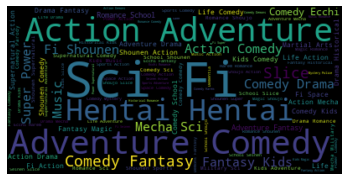

<Figure size 288x288 with 0 Axes>

In [25]:
text = " ".join(review for review in data_df.genre)
print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig= plt.figure(figsize=(4,4))
wordcloud.to_file("Word_Cloud.png")

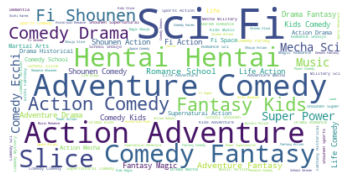

<Figure size 288x288 with 0 Axes>

In [26]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
fig= plt.figure(figsize=(4,4))
wordcloud.to_file("Word_Cloud2.png")


In [ ]:
#ETL Challenge process
#1.	I downloaded the top 50 anime and manga titles from animenewsnetwork
#a.	"https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=172"
#b.	"https://www.animenewsnetwork.com/encyclopedia/reports.xml?id=173")
#2.	Using the xml.etree.Elementree module I converted both XMLs to Dataframes
#3.	Using panda df.merge, I outer merged both converted Dataframes into one list_df Dataframe
#4.	I then used dtypes to determine the type of each column
#5.	For all columns which had numerical values I converted the columns from objects to float64 types
#6.	Next I moved the Manga name column from the end next to the Anime name column
#7.	Finally I sorted the final Dataframe by nb_seen first and straight_average second, to ensure that any potential outliers are not being used for the top anime and manga categories
